## Property Price Prediction Model: GradientBoostRegressor

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
##load dataset 

In [4]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape

(13320, 9)

In [6]:
df1.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [7]:
## Drop features that are not required to build our model

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
## Begin data Cleaning
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
# handle missing values: drop all missing values
df3 = df2.dropna()

In [11]:
df2.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
#function to split raw values: create a new column bedrooms
# size

In [14]:
# refine size column 
df3['bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Andrew\AppData\Local\Temp\ipykernel_11356\3109583246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [15]:
df3

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [16]:
#next we examine the total_sqft feature: make its values in a single unit
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
#check total variations in the column
def is_float(x):
    try:
        return float(x)
    except (TypeError, ValueError):
        return x

In [18]:
# is_object(1384-232)

In [19]:
#  return sqft values that are not float 
df_non_float = df3[df3['total_sqft'].apply(lambda x: isinstance(is_float(x), str))]
df_non_float['total_sqft'].head(10)

30        2100 - 2850
122       3067 - 8156
137       1042 - 1105
165       1145 - 1340
188       1015 - 1540
410    34.46Sq. Meter
549       1195 - 1440
648         4125Perch
661       1120 - 1145
672       3090 - 5002
Name: total_sqft, dtype: object

In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [21]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)


,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [22]:
df4

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


## Feature Engineering
add new feature price per square feet: an important variable real estate

In [23]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5.location.unique())

1298

In [25]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

## Examine variables
We need to apply dimensionality reduction technique here to reduce number of locations

In [26]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   532
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: count, Length: 1298, dtype: int64

In [27]:
len(location_stats[location_stats<10])

1045


Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will reduce errors due dimensions

In [28]:

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: count, Length: 1058, dtype: int64

In [29]:
df5['location'] = df5['location'].apply(lambda x: "other" if x in location_stats_less_than_10 else x )

In [30]:
df5.location.nunique()

241

## Outlier Detection and removal : using mean and standard deviation
Data scienties typically have conversations business managers (who will have expertise in a given field). In real estate, they might tell the analyst the avg. square ft per bedroom figure, say 300 (i.e. 2 bhk apartment is minimum 600 sqft. If the dataset has records with 400 sqft apartment having 2 bedrooms then that can be removed as an outlier. In the following we will utilize 300 as our minimun
<!-- df5.price_per_sqft.describe() -->

In [31]:
df5[df5.total_sqft/df5.bedrooms<300].head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [32]:
df6 = df5[~(df5.total_sqft/df5.bedrooms<300)]
df6

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In our next analysis, we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. Thus, we remove outliers per location using mean and one standard deviation

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10245, 7)

 for a given location how does the 2 bedroom and 3 bedroom property prices compare


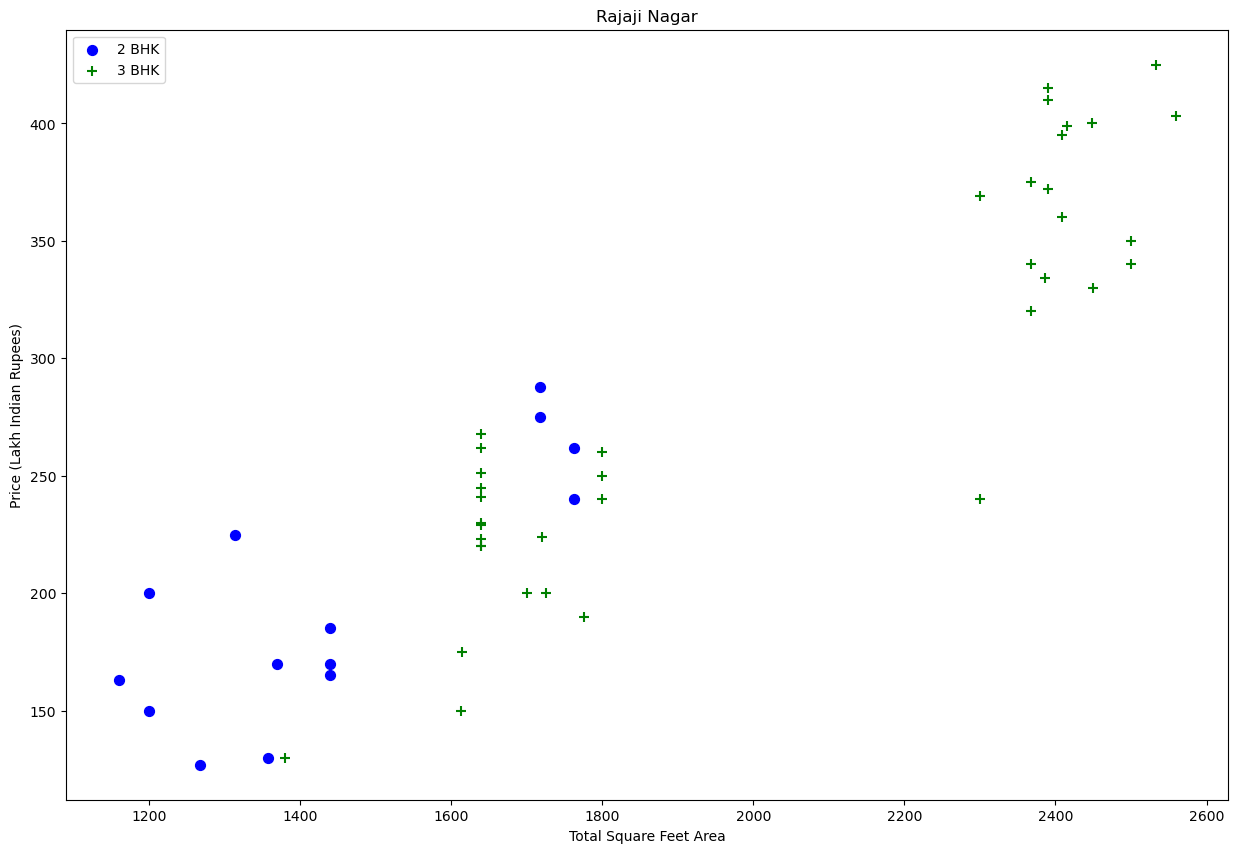

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = df7[(df7.location==location) & (df7.bedrooms==2)]
    bhk3 = df7[(df7.location==location) & (df7.bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

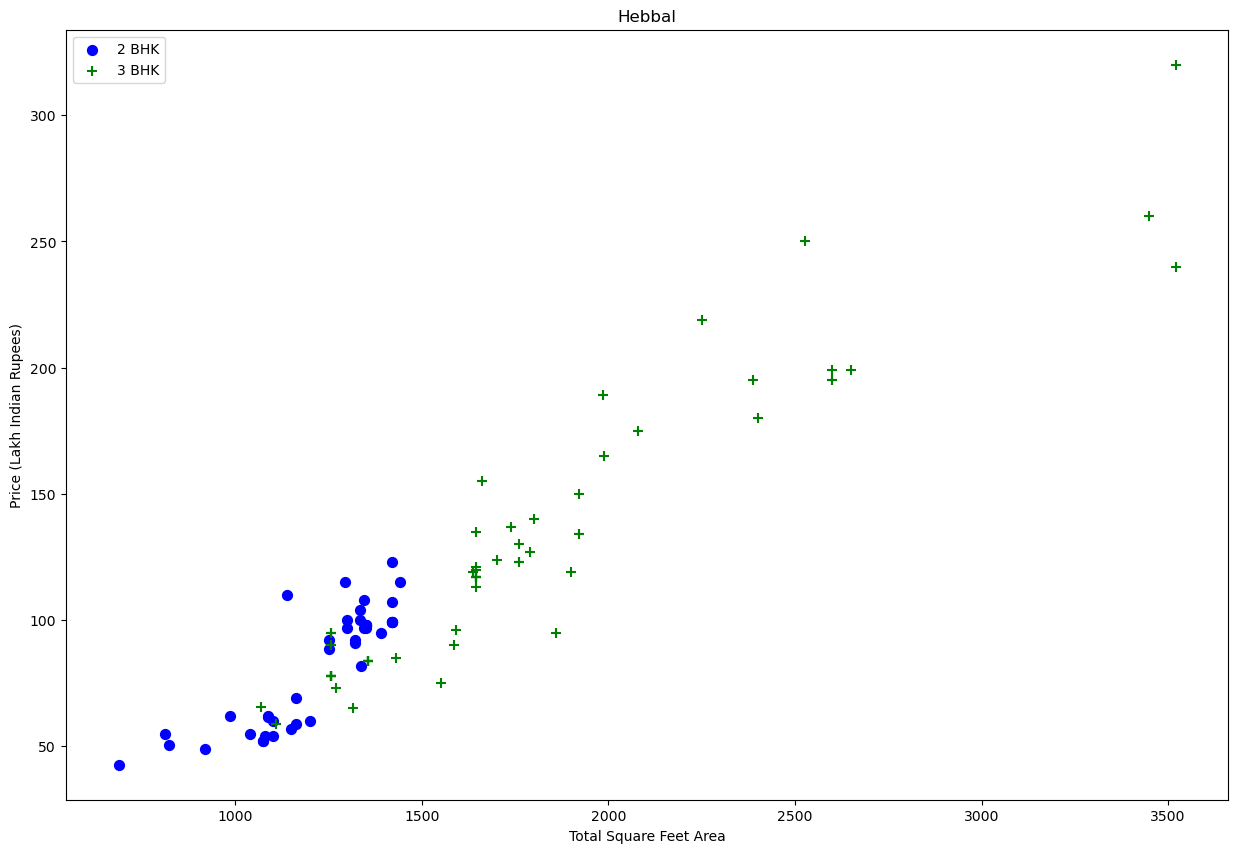

In [35]:
# location b: Hebbal
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

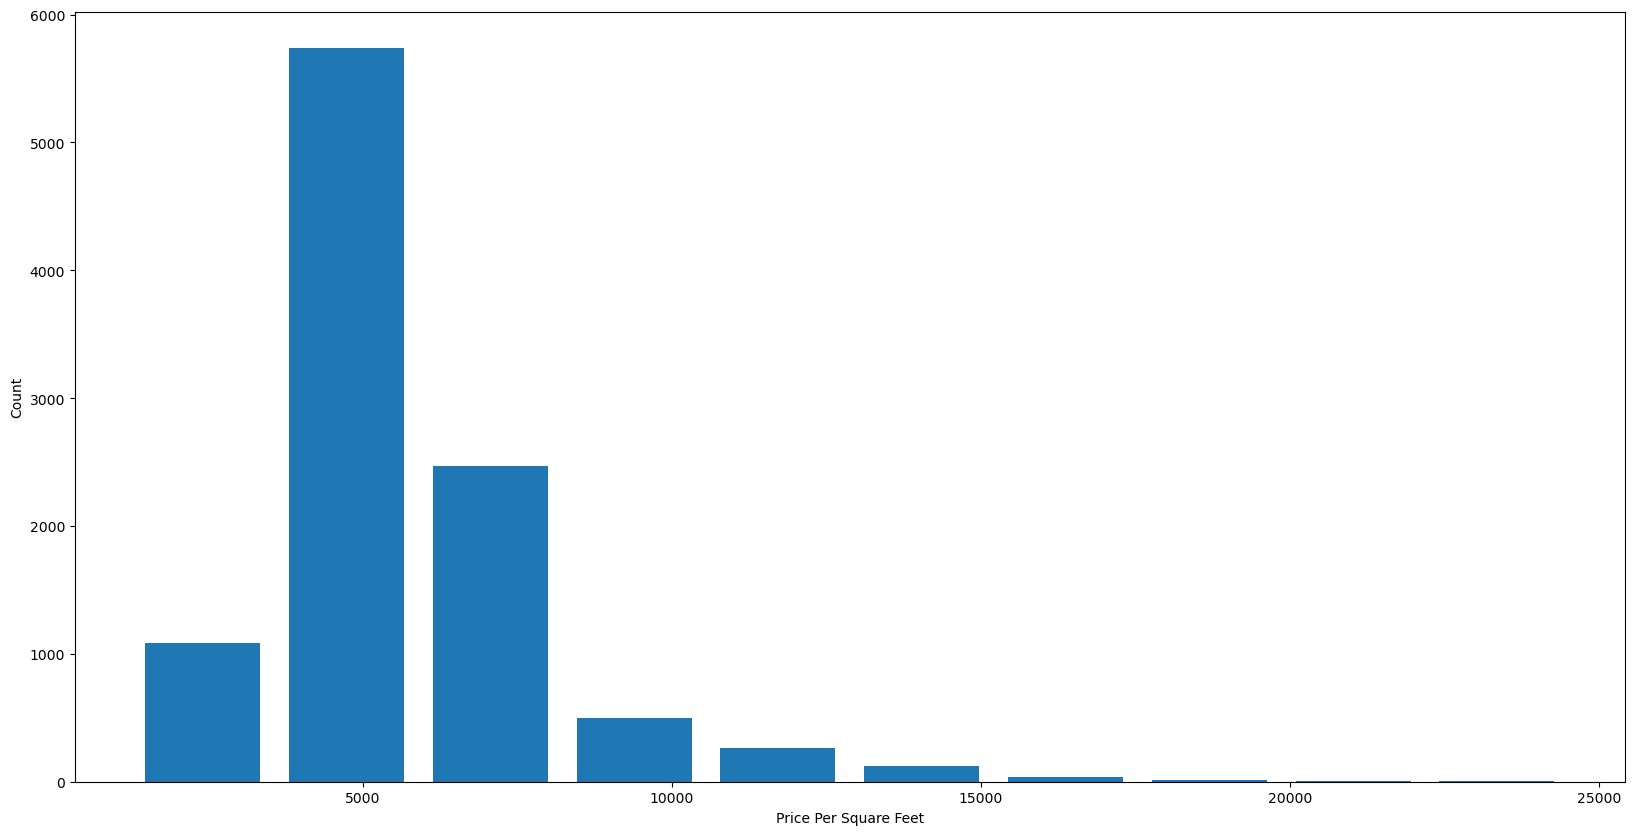

In [36]:
## check distribution using histograms 
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [37]:
# check bathroom distribution
df7.bath.describe()

count    10245.000000
mean         2.474085
std          0.981992
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: bath, dtype: float64

Text(0, 0.5, 'Count')

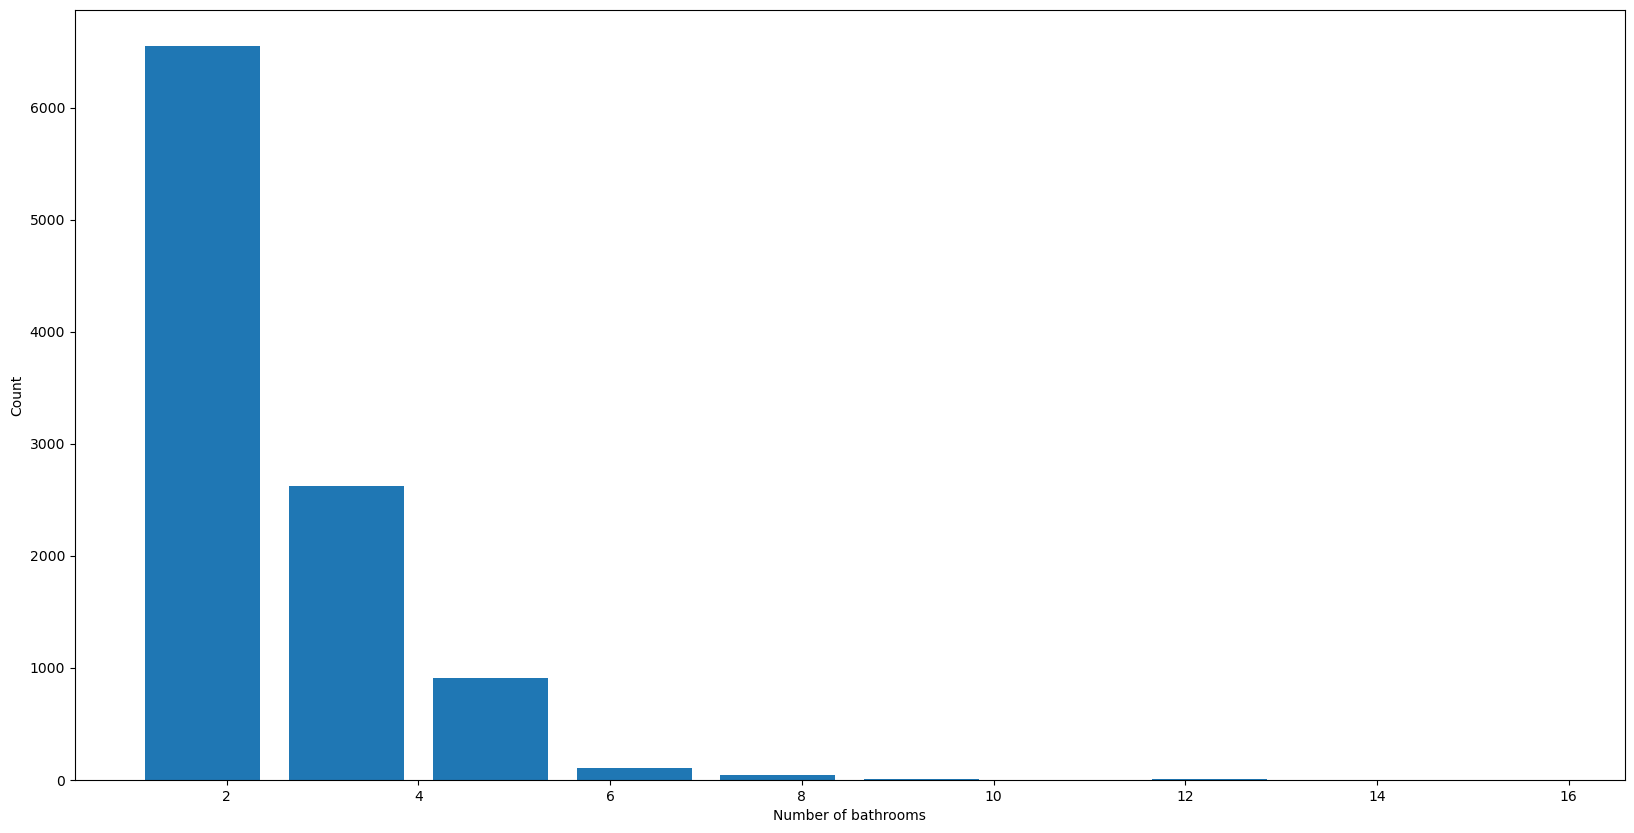

In [38]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [39]:
## drop non-contributing columns: 

In [40]:
df7.head()

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3,4561.403509


In [41]:
df8 = df7.drop(['size','price_per_sqft'], axis =1)
df8.dtypes

location       object
total_sqft    float64
bath          float64
price         float64
bedrooms        int64
dtype: object

In [42]:

# df9.head()
dummies = pd.get_dummies(df8.location, columns='locations')
converted_dummies = dummies.astype(int)

In [43]:
df9 = pd.concat([df8,converted_dummies],axis='columns')
df9.head()

,location,total_sqft,bath,price,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,1250.0,2.0,44.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#drop the location column 
df10 = df9.drop('location',axis=1)
df10.head()

,total_sqft,bath,price,bedrooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,44.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation and Model Buiding

We will use 4 regressor algorithms and select the best using GridsearchCV 

In [45]:
#split X and y variables 
X = df10.iloc[:, df10.columns != 'price']
y = df10.iloc[:, df10.columns == 'price']
# print(f"X {X} and Y {y}")
# y

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
best_params = {
    "n_estimators": 200,
    "max_depth": 3,
    "learning_rate": 0.2,
    "loss": "squared_error"
}

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

1. XGBoost Model 

In [124]:
gradientBoost = GradientBoostingRegressor(**best_params)
gradientBoost.fit(X_train, y_train)
print(f"First five House predictions: {XGmodel.predict(X_train.head())} and the Score: {XGmodel.score(X_test, y_test)}")
mse = mean_squared_error(y_test, XGmodel.predict(X_test))
print("\n The mean squared error (MSE) on test set: {:.4f}".format(mse))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


First five House predictions: [110.34688958  98.12862256  79.34783282  51.53417941  14.34073964] and the Score: 0.747486070025599

 The mean squared error (MSE) on test set: 2366.3804


2. LinearRegressor 

In [49]:
from sklearn.linear_model import LinearRegression


lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
mse = mean_squared_error(y_test, lr_clf.predict(X_test))
print(f"First five House predictions: {lr_clf.predict(X_train.head())} and the Model Score is : {lr_clf.score(X_test, y_test)}")
print("\nThe mean squared error (MSE) on test set: {:.4f}".format(mse))

First five House predictions: [[102.1630445 ]
 [ 98.57406505]
 [ 86.97727244]
 [ 57.11646535]
 [ -1.2744042 ]] and the Model Score is : 0.872776776472111

The mean squared error (MSE) on test set: 1192.2453


Using K-fold cross validation to measure accuracy of of the Regressor models

In [100]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=3, test_size=0.1, random_state=0)

print (f"Linear Regressor Cross-Val Score: {cross_val_score(lr_clf, X, y, cv=cv)}")
print (f"Extreme Gradient Booster Regressor Cross-Val Score: {cross_val_score(XGmodel, X, y, cv=cv)}")

Linear Regressor Cross-Val Score: [0.86423605 0.79924904 0.78097473]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Extreme Gradient Booster Regressor Cross-Val Score: [0.85509457 0.82590178 0.8312029 ]


In [51]:
## From the Observations above, None of the Model could maintain 80 percent accuracy over 5 training iterations

## Using GridSearch for Parameter tuning and Validation: 
We will also use RandomForest and Lasso Regressor

In [52]:
# pip install xgboost

In [53]:

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'LinearRegression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'GradientBoosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3,5],
           
                'random_state': [42]
            }
        },
        'XGBoost': {
            'model': XGBRegressor(),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3,5]
            
            }
        },
         'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'splitter': ['best','random']
            }},
        'RandomForest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [100, 500],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 10],
                'min_samples_leaf': [1, 4]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
 

In [59]:
   # Call the function
results = find_best_model_using_gridsearchcv(X, y)
    
    # Print results
results.sort_values(by='best_score', ascending =False)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


,model,best_score,best_params
1,GradientBoosting,0.792967,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
0,LinearRegression,0.787943,"{'copy_X': True, 'fit_intercept': True}"
4,RandomForest,0.766828,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
2,XGBoost,0.762721,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
3,decision_tree,0.700688,{'splitter': 'best'}


In [125]:
# location = 'Richards Town'
# sqft = 1500
# bath = 2
# bedrooms = 3
# predicted_price = predict_price(location, sqft, bath, bedroom)
# print(f"Predicted price for the property: ${predicted_price:.2f}")


In [127]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1

    return gradientBoost.predict([x])[0]

In [128]:
location = 'Indira Nagar'
sqft = 1500
bath = 2
bedroom = 3
predicted_price = predict_price(location, sqft, bath, bedroom)
print(f"Predicted price for a {bedrooms} bedroom house in {location} is : ${predicted_price:.2f}")

Predicted price for a 3 bedroom house in Indira Nagar is : $138.80


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [129]:
# Export the tested model to a pickle file

In [131]:
import pickle
with open('home_prices.pickle','wb') as f:
    pickle.dump(gradientBoost,f)

In [132]:
#Then we Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))